In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

OAI = pd.read_csv("./Data/OnlineActionInfo.csv")
TFI = pd.read_csv("./Data/TransferInfo.csv")
CTI1 = pd.read_csv("./Data/CustomerInfo.csv")
PDI = pd.read_csv("./Data/product.csv")

In [59]:
print(OAI.shape)
print(OAI.info())
print(TFI.shape)
print(TFI.info())
print(CTI1.shape)
print(CTI1.info())
print(PDI.shape)
print(PDI.info())

(3196362, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196362 entries, 0 to 3196361
Data columns (total 14 columns):
clnt_id            int64
sess_id            int64
hit_seq            int64
action_type        int64
biz_unit           object
sess_dt            int64
hit_tm             object
hit_pss_tm         int64
trans_id           float64
sech_kwd           object
tot_pag_view_ct    float64
tot_sess_hr_v      float64
trfc_src           object
dvc_ctg_nm         object
dtypes: float64(3), int64(6), object(5)
memory usage: 341.4+ MB
None
(599961, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599961 entries, 0 to 599960
Data columns (total 9 columns):
clnt_id      599961 non-null int64
trans_id     599961 non-null int64
trans_seq    599961 non-null int64
biz_unit     599961 non-null object
pd_c         599961 non-null object
de_dt        599961 non-null int64
de_tm        599961 non-null object
buy_am       599961 non-null int64
buy_ct       599961 non-null int64
dty

In [26]:
OAI.isnull().sum()

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

In [15]:
print(len(CTI1[CTI1["clnt_gender"]=="unknown"]))
print(len(CTI1[CTI1["clnt_gender"]!="unknown"]))

60154
12245


In [16]:
cti = CTI1[CTI1["clnt_gender"]!="unknown"]
cti["count"] = 1
cti_group = pd.pivot_table(cti,index="clnt_gender",columns="clnt_age",values="count",aggfunc=np.sum)
cti_group

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


clnt_age,10,20,30,40,50,60
clnt_gender,,,,,,
F,34,762,3680,4200,1435,241
M,12,162,627,748,259,85


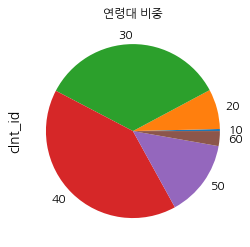

In [19]:
df3=cti.groupby(['clnt_age'])  
df3=df3['clnt_id'].sum()
df3.plot(kind='pie',title='연령대 비중') # 10대 60대 비율 적음

In [22]:
TFI["buy_am"].sort_values(ascending=False).head()

19237     100000016899
163188    100000007199
285349        11800000
501157        11578450
154811        10500000
Name: buy_am, dtype: int64

In [23]:
TFI[(TFI["buy_am"]>100000000)] #비정상적인 값

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
19237,50600,102331,5,A03,0382,20190917,14:19,100000016899,1
163188,50841,85664,3,A03,unknown,20190827,15:04,100000007199,4


In [24]:
PDI[PDI["pd_c"]==382] 

,pd_c,clac_nm1,clac_nm2,clac_nm3
381,382,Detergents / Hygiene Goods,Tissues and Papers,Toilet Papers


In [25]:
TFI[(TFI["buy_am"]==0)|(TFI["buy_ct"]==0)]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
1767,42911,107571,11,A03,1183,20190923,15:24,0,0
1830,42911,107571,12,A03,1213,20190923,15:24,0,0
1841,42911,107571,9,A03,1215,20190923,15:24,0,0
1845,42911,107571,2,A03,1213,20190923,15:24,0,0
1851,42911,107571,10,A03,1189,20190923,15:24,0,0
1862,42911,107571,7,A03,0362,20190923,15:24,0,0
4155,47093,99719,5,A03,0565,20190914,12:07,0,0
4860,11684,100976,4,A03,0538,20190916,07:41,0,0
5287,11507,101303,2,A03,0104,20190916,16:32,0,0
5390,11507,101303,3,A03,1213,20190916,16:32,0,0


In [29]:
TFI[(TFI["pd_c"]=="1183")].head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
429,32198,105110,4,A03,1183,20190920,16:52,3690,1
430,61988,105011,8,A03,1183,20190920,13:17,3690,1
437,34516,104997,3,A03,1183,20190920,12:36,1150,1
523,63118,105148,10,A03,1183,20190920,18:42,1650,1
524,65635,104968,8,A03,1183,20190920,11:30,3690,1


In [30]:
OAI[OAI["tot_sess_hr_v"].isnull()].sort_values(by="tot_pag_view_ct",ascending=False)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
3122781,26793,5,1,0,A01,20190728,18:46,2,NaN,게스반팔,3.0,NaN,unknown,mobile_web
1936454,30510,1,4,1,A02,20190814,15:50,47427,NaN,NaN,2.0,NaN,unknown,PC
2164635,17780,1,3,1,A02,20190706,22:59,34110,NaN,NaN,2.0,NaN,unknown,PC
1989294,26939,5,1,2,A02,20190719,20:08,974,NaN,NaN,2.0,NaN,unknown,mobile_app
493113,71991,43,2,2,A03,20190822,10:52,248,NaN,NaN,2.0,NaN,WEBSITE,mobile_web
3001560,6603,3,1,0,A01,20190901,18:38,321,NaN,퓨어프레쉬,2.0,NaN,unknown,mobile_app
493130,71991,29,2,2,A03,20190820,07:13,480,NaN,NaN,2.0,NaN,WEBSITE,mobile_web
2059076,40094,1,2,5,A02,20190828,14:03,7209,NaN,NaN,2.0,NaN,unknown,PC
2059078,40094,1,1,2,A02,20190828,14:03,994,NaN,NaN,2.0,NaN,unknown,PC
1936455,30510,1,1,2,A02,20190814,15:49,1041,NaN,NaN,2.0,NaN,unknown,PC


In [31]:
OAI["tot_pag_view_ct"].mean()

45.73830007130038

In [40]:
OAI[(OAI["tot_pag_view_ct"].isnull())&(OAI["tot_sess_hr_v"].notnull())]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
11752,47755,20,1,3,A03,20190818,01:27,2837,NaN,NaN,NaN,4.0,DIRECT,NaN
36122,50615,75,1,3,A03,20190921,14:25,30210,NaN,NaN,NaN,30.0,DIRECT,NaN
40438,43730,11,3,3,A03,20190923,13:21,93862,NaN,NaN,NaN,543.0,DIRECT,NaN
40514,43730,11,2,3,A03,20190923,13:21,82601,NaN,NaN,NaN,543.0,DIRECT,NaN
40517,43730,11,1,3,A03,20190923,13:20,0,NaN,NaN,NaN,543.0,DIRECT,NaN
40554,43730,11,4,3,A03,20190923,13:29,543116,NaN,NaN,NaN,543.0,DIRECT,NaN
42592,34066,19,1,3,A03,20190910,22:14,15344,NaN,NaN,NaN,15.0,DIRECT,NaN
53516,48130,66,1,3,A03,20190904,11:04,21770,NaN,NaN,NaN,22.0,DIRECT,NaN
71706,40413,28,5,3,A03,20190906,09:35,67779,NaN,NaN,NaN,86.0,DIRECT,NaN
71840,40413,28,2,3,A03,20190906,09:34,4143,NaN,NaN,NaN,86.0,DIRECT,NaN


In [39]:
OAI["hit_pss_tm"].mean()

826640.3372434035

In [52]:
OAI[(OAI["tot_pag_view_ct"].isnull())&(OAI["tot_sess_hr_v"].notnull())]["hit_pss_tm"].mean()

158553.02702702704

In [49]:
OAI["dvc_ctg_nm"].isnull().sum()

1782577

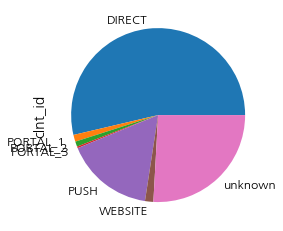

In [51]:
pii = OAI[["clnt_id","trfc_src"]].groupby("trfc_src").count()
pii["clnt_id"].plot(kind="pie")

In [43]:
len(OAI)

3196362

In [57]:
oai = OAI[(OAI["action_type"]==7)].reset_index()
oai[oai["trans_id"]==41014]

,index,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
41,118563,39004,1,61,7,A03,20190703,16:14,1757681,41014.0,NaN,52.0,1797.0,DIRECT,NaN
42,118576,39004,1,70,7,A03,20190703,16:14,1793736,41014.0,NaN,52.0,1797.0,DIRECT,NaN


In [56]:
OAI[OAI["trans_id"]==41014]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
118563,39004,1,61,7,A03,20190703,16:14,1757681,41014.0,NaN,52.0,1797.0,DIRECT,NaN
118576,39004,1,70,7,A03,20190703,16:14,1793736,41014.0,NaN,52.0,1797.0,DIRECT,NaN
118591,39004,1,60,6,A03,20190703,16:02,1054209,41014.0,NaN,52.0,1797.0,DIRECT,NaN


In [55]:
TFI[TFI["trans_id"]==41014]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
128312,39004,41014,4,A03,1571,20190703,16:02,1990,1
128313,39004,41014,3,A03,1571,20190703,16:02,1990,1
128434,39004,41014,7,A03,0945,20190703,16:02,11920,4
128438,39004,41014,6,A03,0958,20190703,16:02,3570,3
128440,39004,41014,2,A03,0968,20190703,16:02,7900,1
128442,39004,41014,8,A03,0933,20190703,16:02,3990,1
128590,39004,41014,5,A03,0155,20190703,16:02,6990,1
128706,39004,41014,1,A03,1244,20190703,16:02,3130,1
